In [2]:
import cv2
import numpy as np
import pandas as pd
import os
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# Load and scale data for training
x=np.array([])
y=np.array([])
data_path=r"C:\Users\Rohit Varre\Desktop\MliS\Python\SYN data"
categories=os.listdir(data_path)
labels = [i for i in range(len(categories))]
code=dict(zip(categories,labels))                      # Dictionary for label encoding
for folder in categories:
    folder_path=os.path.join(data_path,folder)
    data=os.listdir(folder_path)
    for dat in data:
        dat_path=os.path.join(folder_path,dat)
        inp=pd.read_csv(dat_path)
        inp = inp.iloc[:,1:]
        inp = inp.values
        ref = inp[0]
        inp = inp-ref                                 # Scaling the data with respect to the wrist
        x = np.append(x,inp[1:]).reshape(-1,3)
        y = np.append(y,code[folder])

In [4]:
# Reshaping and type casting
x = np.float16(np.reshape(x,(-1,60)))
y = np.reshape(y,(-1,1)).astype(int)
print(x.shape,y.shape)
print(x.min(),x.max())

(500, 60) (500, 1)
-0.572 0.2181


<ipython-input-5-7642b264d048>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<AxesSubplot:ylabel='Density'>

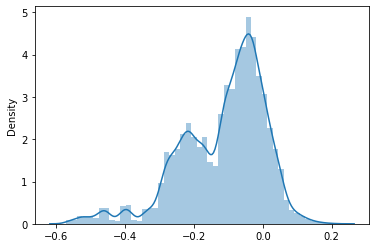

In [5]:
# Distribution Plot
sns.distplot(x)

In [6]:
# Train test split for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
output_layer = len(np.unique(y))                  # Number of nodes in the output layer
print(output_layer)                

5


In [7]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(400, 60) (400, 1) (100, 60) (100, 1)


In [8]:
# Model Architecture
model = Sequential([

    Dense(units = 40, input_shape = (60,), activation = 'relu'),
    Dropout(0.2),
    Dense(units = 20, activation = 'relu'),
    Dense(units = output_layer, activation = 'softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                2440      
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
Total params: 3,365
Trainable params: 3,365
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x=x_train,y=y_train,epochs=10,verbose=2,validation_split=0.2,batch_size=8)

Epoch 1/10
40/40 - 2s - loss: 1.2106 - accuracy: 0.4719 - val_loss: 0.6700 - val_accuracy: 0.9000
Epoch 2/10
40/40 - 0s - loss: 0.4616 - accuracy: 0.8750 - val_loss: 0.1545 - val_accuracy: 0.9500
Epoch 3/10
40/40 - 0s - loss: 0.1753 - accuracy: 0.9625 - val_loss: 0.0549 - val_accuracy: 1.0000
Epoch 4/10
40/40 - 0s - loss: 0.1425 - accuracy: 0.9594 - val_loss: 0.0430 - val_accuracy: 1.0000
Epoch 5/10
40/40 - 0s - loss: 0.1052 - accuracy: 0.9688 - val_loss: 0.0543 - val_accuracy: 0.9750
Epoch 6/10
40/40 - 0s - loss: 0.0729 - accuracy: 0.9812 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 7/10
40/40 - 0s - loss: 0.0296 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 8/10
40/40 - 0s - loss: 0.0267 - accuracy: 0.9969 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 9/10
40/40 - 0s - loss: 0.0209 - accuracy: 0.9969 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 10/10
40/40 - 0s - loss: 0.0251 - accuracy: 0.9906 - val_loss: 0.0051 - val_accuracy: 1.0000


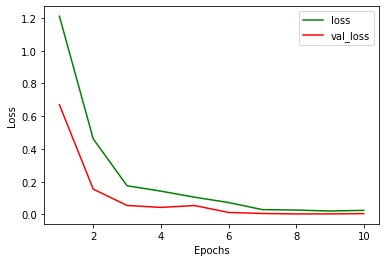

In [15]:
# Loss vs Epochs plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

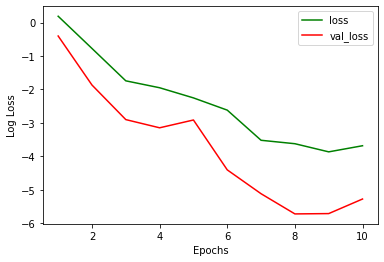

In [16]:
loss = np.log(loss)
val_loss = np.log(val_loss)
epochs = range(1,11)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [11]:
# Confusion Matrix and accuracy for training and testing data
predictions=model.predict(x=x_test,verbose=0)
predictions1 = model.predict(x=x_train,verbose=0)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import accuracy_score
print("Testing data")
cm=confusion_matrix(y_true=y_test,y_pred=predictions.argmax(axis=1))
print(cm)
print(accuracy_score(y_test,y_pred=predictions.argmax(axis=1)))
print("Training data")
cm1=confusion_matrix(y_true=y_train,y_pred=predictions1.argmax(axis=1))
print(cm1)
print(accuracy_score(y_train,y_pred=predictions1.argmax(axis=1)))

Testing data
[[16  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 26  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 19]]
1.0
Training data
[[84  0  0  0  0]
 [ 0 77  0  0  0]
 [ 0  0 74  0  0]
 [ 0  0  0 84  0]
 [ 0  0  0  0 81]]
1.0


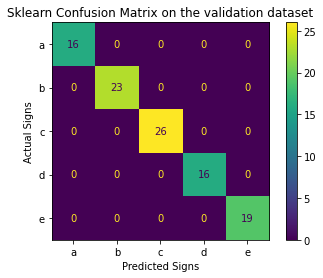

In [12]:
cm_display = ConfusionMatrixDisplay(cm, display_labels=categories)
cm_display.plot()
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
cm_display.ax_.set(
                title='Sklearn Confusion Matrix on the validation dataset', 
                xlabel='Predicted Signs', 
                ylabel='Actual Signs'
)
plt.show()

In [41]:
model.save('mediapipe.h5')     # Saving the model